Stefania Zanetta S4463362
##Project P08-RL: Eligibility Traces
TD(lambda) not discussed in class. Connection with the SARSA and Q-learning (Python
notebook a plus). See S&B chapter 7 for inspiration.


####Notebook: an overview
In the notebook submited I tried to show the difference results in Sarsa(λ) and Q-Learning(λ) with different values of λ. The experiments where done on a simplified version of PacMan. To better show the differences between Sarsa(λ) and Q-Learning(λ) on different envirioments, I decided to implement 4 different version of the game. For every version there’s in common the layout of the maze and the fact that every step in a non-final state cost -1 reward.




*   The first version of the envirioment, being the simpler one, where there’s only one final state with a positive reward.
*   The second version I added little rewards (+2) on certain middle way states (taking inspiration by the little white dots that can be seen on the original game). But, once taken the rewards of these states they go back being “normal states” where the reward is -1, deleting the white dot from the map. Like on the previous version there’s only one final state.
*   The third version introduces new final states, that give a negative reward. Like before, this concept takes inspiration by the real game and should represent the ghosts, but differently from the original game they don’t move.
*   In the end the fourth version, while not introducing any new “mechanincs of the game”, it introduces randomicity of the various states on the map. Both number and position of the white dots and ghost are randomly generated. But the final positive reward and starting position of the agent stays the same.



For every algorithm with different λ and for each version of the game, I showed: the average reward over 100 episodes, the average TD error over 100 episodes, the final policy and an heatmap of the eligibility trace.
In the end after running all the versions of the game with different λ, I showed all the results taken from the experiments (average rewards, average TD error, average number of steps taken for each algorithm).


##Imports and Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate, time
import random
from statistics import mean

In [2]:
tabulate.PRESERVE_WHITESPACE = True
tabulate.WIDE_CHARS_MODE = False

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

EPISODES = 100
STEPS_MAX = 1500

ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1

Tot_avg_results = []
Sarsa = []
Q_L = []

In [4]:
## Recreate level layout
M1= [[0,0] , [0,1], [0,2], [0,3], [0,4], [0,5], [0,6], [0,7], [0,8], [0,9], [0,10], [0,11], [0,12], [0,13], [0,14], [0,15], [0,16], [0,17], [0,18], [0,19], [0, 20], [0,21], [0,22], [0,23], [0,24] ]
M2= [[1,0] , [1,12], [1,24]]
M3= [[2,0] , [2,2], [2,3], [2,4], [2,5], [2,7], [2,8], [2,9], [2,10], [2,12], [2,14], [2,15], [2,16], [2,17], [2,19], [2, 20], [2,21], [2,22], [2,24]]
M4= [[3,0] , [3,2], [3,3], [3,4], [3,5], [3,7], [3,8], [3,9], [3,10], [3,12], [3,14], [3,15], [3,16], [3,17], [3,19], [3, 20], [3,21], [3,22], [3,24]]
M5= [[4,0] , [4,24]]
M6= [[5,0] , [5,2], [5,3], [5,4], [5,5], [5,7], [5,9], [5,10], [5,11], [5,12], [5,13], [5,14], [5,15], [5,17], [5,19], [5, 20], [5,21], [5,22], [5,24]]
M7= [[6,0] , [6,2], [6,3], [6,4], [6,5], [6,7], [6,9], [6,10], [6,11], [6,12], [6,13], [6,14], [6,15], [6,17], [6,19], [6, 20], [6,21], [6,22], [6,24]]
M8= [[7,0] , [7,7], [7,12], [7,17], [7,24]]
M9= [[8,0] , [8,1], [8,2], [8,3], [8,4], [8,5], [8,7], [8,17], [8,19], [8, 20], [8,21], [8,22], [8,23], [8,24]]
M10= [[9,0] , [9,1], [9,2], [9,3], [9,4], [9,5], [9,7], [9,9], [9,10], [9,11], [9,13], [9,14], [9,15], [9,17], [9,19], [9, 20], [9,21], [9,22], [9,23], [9,24]]
M11= [[10,0] , [10,1], [10,2], [10,3], [10,4], [10,5], [10,7], [10,9], [10,15], [10,17], [10,19], [10, 20], [10,21], [10,22], [10,23], [10,24]]
M12= [[11,0] , [11,1], [11,2], [11,3], [11,4], [11,5], [11,7], [11,9], [11,15], [11,17], [11,19], [11, 20], [11,21], [11,22], [11,23], [11,24]]
M13= [[12,9], [12,15]]
M14= [[13,0] , [13,1], [13,2], [13,3], [13,4], [13,5], [13,7], [13,9], [13,15], [13,17], [13,19], [13, 20], [13,21], [13,22], [13,23], [13,24]]
M15= [[14,0] , [14,1], [14,2], [14,3], [14,4], [14,5], [14,7], [14,9], [14,10], [14,12], [14,11], [14,13], [14,14], [14,15], [14,17], [14,19], [14, 20], [14,21], [14,22], [14,23], [14,24]]
M16= [[15,0] , [15,1], [15,2], [15,3], [15,4], [15,5], [15,7], [15,17], [15,19], [15, 20], [15,21], [15,22], [15,23], [15,24]]
M17= [[16,0] , [16,1], [16,2], [16,3], [16,4], [16,5], [16,7], [16,9], [16,10], [16,12], [16,11], [16,13], [16,14], [16,15], [16,17], [16,19], [16, 20], [16,21], [16,22], [16,23], [16,24]]
M18= [[17,0] ,[17,12], [17,24]]
M19= [[18,0], [18,2], [18,3], [18,4], [18,5], [18,7], [18,8], [18,9], [18,10], [18,12], [18,14], [18,15], [18,16], [18,17], [18,19], [18,20], [18,21], [18,22], [18,24]]
M20= [[19,0] , [19,5],  [19,19], [19,24]]
M21= [[20,0] , [20,1], [20,2], [20,3], [20,5], [20,7], [20,9], [20,10], [20,11], [20,11], [20,12], [20,13], [20,14], [20,15], [20,17], [20, 19], [20,21], [20,22], [20,23], [20,24]]
M22= [[21,0] , [21,7], [21,12], [21,17], [21,24]]
M23= [[22,0] , [22,2], [22,3], [22,4], [22,5], [22,6], [22,7], [22,8], [22,9], [22,10], [22,12], [22,14], [22,15], [22,16], [22,17], [22,18], [22,19], [22, 20], [22,21], [22,22], [22,24]]
M24= [[23,0], [23,24]]
M25= [[24,0] , [24,1], [24,2], [24,3], [24,4], [24,5], [24,6], [24,7], [24,8], [24,9], [24,10], [24,11], [24,12], [24,13], [24,14], [24,15], [24,16], [24,17], [24,18], [24,19], [24, 20], [24,21], [24,22], [24,23], [24,24]]

In [5]:
WALLS=M1+M2+M3+M4+M5+M6+M7+M8+M9+M10+M11+M12+M13+M14+M15+M16+M17+M18+M19+M20+M21+M22+M23+M24+M25

In [6]:
white_dots=[[1,5],[1,6],[13,6],[23,20],[23,21],[23,19]]

####Randomized Variables

In [7]:
n_ofWD = random.randint(0, 40)
n_ofWD

22

In [8]:
n_ofGH = random.randint(1, 3)
n_ofGH

3

In [9]:
white_dots_r =[]
x=[0,0]
for i in range(n_ofWD):
  while True:
    x[0] = random.randint(0, 24)
    x[1] = random.randint(0, 24)

    if x in WALLS+[1,1]+[23,23]:
      continue
    else:
      white_dots_r.append(x)
      x = [0,0]
      break


In [10]:
ghost_r =[]
x=[0,0]
for i in range(n_ofGH):
  while True:
    x[0] = random.randint(0, 24)
    x[1] = random.randint(0, 24)

    if x in WALLS+[1,1]+[23,23]+white_dots_r:
      continue
    else:
      ghost_r.append(x)
      x = [0,0]
      break

##Different Pacman Levels Classes



*   Level 1 : Every step (reward -1) | 1 Final State (reward +100)




In [11]:
class Level1:
    def __init__(self, size, obstacles):
        self.size = size
        self.image_size = 100
        self.obstacles = obstacles
        self.agent_position = [1, 1]
        self.destination = [self.size - 2, self.size - 2]
        self.trajectory = []
        self.actions = ["Up", "Right", "Down", "Left"]

        self.agent_symbol = "\033[1;30;43mC\033[0;0m" #Agent: C with yellow background
        self.obstacle_symbol = "\033[48;5;236m \033[0;0m" #Walls: back background
        self.win_symbol = "\033[1;30;46mO\033[0;0m" #Win: O with blue background
        self.empty_symbol = " "
        self.up_symbol = "^"
        self.right_symbol = ">"
        self.down_symbol = "v"
        self.left_symbol = "<"

    def available_actions(self):
        '''
        Returns the list of available actions for the agent in the current state.
        '''
        actions = []
        if self.agent_position[0] > 0 and [self.agent_position[0] - 1, self.agent_position[1]] not in self.obstacles:
            actions.append(0)
        if self.agent_position[1] < self.size - 1 and [self.agent_position[0], self.agent_position[1] + 1] not in self.obstacles:
            actions.append(1)
        if self.agent_position[0] < self.size - 1 and [self.agent_position[0] + 1, self.agent_position[1]] not in self.obstacles:
            actions.append(2)
        if self.agent_position[1] > 0 and [self.agent_position[0], self.agent_position[1] - 1] not in self.obstacles:
            actions.append(3)
        return actions

    def step(self, action):
        '''
        Performs the given action and returns the next state, the reward and whether the episode is done.

        Args:
            action (int): The action to perform.
        '''
        if action == 0:  # Up
            self.agent_position[0] = self.agent_position[0] - 1
        elif action == 1:  # Right
            self.agent_position[1] = self.agent_position[1] + 1
        elif action == 2:  # Down
            self.agent_position[0] = self.agent_position[0] + 1
        elif action == 3:  # Left
            self.agent_position[1] = self.agent_position[1] - 1

        self.trajectory.append((self.agent_position[0], self.agent_position[1], action))

        reward = -1
        done = False
        if self.agent_position == self.destination:
            reward = 100
            done = True

        return np.array(self.agent_position), reward, done

    def render(self):
        '''
        Renders the current state of the environment.
        '''
        grid = [[self.empty_symbol for _ in range(self.size)] for _ in range(self.size)]
        grid[self.agent_position[0]][self.agent_position[1]] = self.agent_symbol
        grid[self.destination[0]][self.destination[1]] = self.win_symbol
        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = self.obstacle_symbol
        print(tabulate.tabulate(grid, tablefmt="simple_grid"))
        print()

    def reset(self):
        '''
        Resets the environment to its initial state.
        '''
        self.agent_position = [1, 1]
        self.trajectory = []
        return np.array(self.agent_position)

    def show_trajectory(self):
        '''
        Renders the trajectory of the agent.
        '''
        grid = [[self.empty_symbol for _ in range(self.size)] for _ in range(self.size)]
        grid[self.destination[0]][self.destination[1]] = self.win_symbol
        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = self.obstacle_symbol
        for i in range(len(self.trajectory)):
            grid[self.trajectory[i][0]][self.trajectory[i][1]] = self.up_symbol if self.trajectory[i][2] == 0 else \
                self.right_symbol if self.trajectory[i][2] == 1 else \
                self.down_symbol if self.trajectory[i][2] == 2 else \
                self.left_symbol
        grid[self.agent_position[0]][self.agent_position[1]] = self.agent_symbol
        print(tabulate.tabulate(grid, tablefmt="simple_grid"))
        print()



*   Level 2 : Every step (reward -1) | Every white dot (reward +2) | 1 Final State (reward +100)




In [12]:
class Level2:
    def __init__(self, size, obstacles, white_dots):
        self.size = size
        self.image_size = 100
        self.obstacles = obstacles
        self._white_dots = white_dots
        self.agent_position = [1, 1]
        self.destination = [self.size - 2, self.size - 2]
        self.trajectory = []
        self.actions = ["Up", "Right", "Down", "Left"]

        self.agent_symbol = "\033[1;30;43mC\033[0;0m" #Agent: C with yellow background
        self.obstacle_symbol = "\033[48;5;236m \033[0;0m" #Walls: back background
        self.win_symbol = "\033[1;30;46mO\033[0;0m" #Win: O with blue background
        self.dot_symbol = "°"
        self.empty_symbol = " "
        self.up_symbol = "^"
        self.right_symbol = ">"
        self.down_symbol = "v"
        self.left_symbol = "<"

    @property
    def white_dots(self):
        '''
        Check if found one of +2 white dots
        '''
        return self._white_dots

    @white_dots.setter
    def set_white_dots(self, white_dots):
        '''
        Check if found one of +2 white dots
        '''
        temp = [] + white_dots
        self._white_dots = temp


    def available_actions(self):
        '''
        Returns the list of available actions for the agent in the current state.
        '''
        actions = []
        if self.agent_position[0] > 0 and [self.agent_position[0] - 1, self.agent_position[1]] not in self.obstacles:
            actions.append(0)
        if self.agent_position[1] < self.size - 1 and [self.agent_position[0], self.agent_position[1] + 1] not in self.obstacles:
            actions.append(1)
        if self.agent_position[0] < self.size - 1 and [self.agent_position[0] + 1, self.agent_position[1]] not in self.obstacles:
            actions.append(2)
        if self.agent_position[1] > 0 and [self.agent_position[0], self.agent_position[1] - 1] not in self.obstacles:
            actions.append(3)
        return actions

    def step(self, action):
        '''
        Performs the given action and returns the next state, the reward and whether the episode is done.

        Args:
            action (int): The action to perform.
        '''
        if action == 0:  # Up
            self.agent_position[0] = self.agent_position[0] - 1
        elif action == 1:  # Right
            self.agent_position[1] = self.agent_position[1] + 1
        elif action == 2:  # Down
            self.agent_position[0] = self.agent_position[0] + 1
        elif action == 3:  # Left
            self.agent_position[1] = self.agent_position[1] - 1

        self.trajectory.append((self.agent_position[0], self.agent_position[1], action))
        if self.is_a_white_dot():
          reward = +2
        else:
          reward = -1

        done = False
        if self.agent_position == self.destination:
            reward = 100
            done = True

        return np.array(self.agent_position), reward, done

    def render(self):
        '''
        Renders the current state of the environment.
        '''
        grid = [[self.empty_symbol for _ in range(self.size)] for _ in range(self.size)]
        grid[self.agent_position[0]][self.agent_position[1]] = self.agent_symbol
        grid[self.destination[0]][self.destination[1]] = self.win_symbol
        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = self.obstacle_symbol
        for wd in self.white_dots:
            grid[wd[0]][wd[1]] = self.dot_symbol
        print(tabulate.tabulate(grid, tablefmt="simple_grid"))
        print()

    def is_a_white_dot(self):
        '''
        Check if found one of the white dots
        '''
        found = False
        where = []
        for wd in self.white_dots:
          if self.agent_position == wd:
            found = True
            where = where + wd
            break

        curr_white_dots = [x for x in self.white_dots if x != where]
        self.set_white_dots = curr_white_dots
        return found

    def reset(self):
        '''
        Resets the environment to its initial state.
        '''
        self.agent_position = [1, 1]
        self.trajectory = []
        return np.array(self.agent_position)

    def show_trajectory(self):
        '''
        Renders the trajectory of the agent.
        '''
        grid = [[self.empty_symbol for _ in range(self.size)] for _ in range(self.size)]
        grid[self.destination[0]][self.destination[1]] = self.win_symbol
        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = self.obstacle_symbol
        for wd in self.white_dots:
            grid[wd[0]][wd[1]] = self.dot_symbol
        for i in range(len(self.trajectory)):
            grid[self.trajectory[i][0]][self.trajectory[i][1]] = self.up_symbol if self.trajectory[i][2] == 0 else \
                self.right_symbol if self.trajectory[i][2] == 1 else \
                self.down_symbol if self.trajectory[i][2] == 2 else \
                self.left_symbol
        grid[self.agent_position[0]][self.agent_position[1]] = self.agent_symbol
        print(tabulate.tabulate(grid, tablefmt="simple_grid"))
        print()




*   Level 3 : Every step (reward -1) | Every\ white dot (reward +2) | 2 Final State (win: reward +100) (loss: reward -50)




In [13]:
class Level3:
    def __init__(self, size, obstacles, white_dots, ghost):
        self.size = size
        self.image_size = 100
        self.obstacles = obstacles
        self.ghost = ghost
        self._white_dots = white_dots
        self.agent_position = [1, 1]
        self.destination = [self.size - 2, self.size - 2]
        self.trajectory = []
        self.actions = ["Up", "Right", "Down", "Left"]

        self.agent_symbol = "\033[1;30;43mC\033[0;0m" #Agent: C with yellow background
        self.obstacle_symbol = "\033[48;5;236m \033[0;0m" #Walls: back background
        self.win_symbol = "\033[1;30;46mO\033[0;0m" #Win: O with blue background
        self.ghost_symbol = "\033[1;37;41mF\033[0;0m" #Lose: F with red background
        self.dot_symbol = "°"
        self.empty_symbol = " "
        self.up_symbol = "^"
        self.right_symbol = ">"
        self.down_symbol = "v"
        self.left_symbol = "<"

    @property
    def white_dots(self):
        '''
        Check if found one of +2 white dots
        '''
        return self._white_dots

    @white_dots.setter
    def set_white_dots(self, white_dots):
        '''
        Check if found one of +2 white dots
        '''
        temp = [] + white_dots
        self._white_dots = temp


    def available_actions(self):
        '''
        Returns the list of available actions for the agent in the current state.
        '''
        actions = []
        if self.agent_position[0] > 0 and [self.agent_position[0] - 1, self.agent_position[1]] not in self.obstacles:
            actions.append(0)
        if self.agent_position[1] < self.size - 1 and [self.agent_position[0], self.agent_position[1] + 1] not in self.obstacles:
            actions.append(1)
        if self.agent_position[0] < self.size - 1 and [self.agent_position[0] + 1, self.agent_position[1]] not in self.obstacles:
            actions.append(2)
        if self.agent_position[1] > 0 and [self.agent_position[0], self.agent_position[1] - 1] not in self.obstacles:
            actions.append(3)
        return actions

    def step(self, action):
        '''
        Performs the given action and returns the next state, the reward and whether the episode is done.

        Args:
            action (int): The action to perform.
        '''
        if action == 0:  # Up
            self.agent_position[0] = self.agent_position[0] - 1
        elif action == 1:  # Right
            self.agent_position[1] = self.agent_position[1] + 1
        elif action == 2:  # Down
            self.agent_position[0] = self.agent_position[0] + 1
        elif action == 3:  # Left
            self.agent_position[1] = self.agent_position[1] - 1

        self.trajectory.append((self.agent_position[0], self.agent_position[1], action))

        if self.is_a_white_dot():
          reward = +2
        else:
          reward = -1

        done = False
        if self.agent_position == self.destination:
            reward = 100
            done = True
        else:
            if self.is_ghosts():
              reward = -50
              done = True

        return np.array(self.agent_position), reward, done

    def render(self):
        '''
        Renders the current state of the environment.
        '''
        grid = [[self.empty_symbol for _ in range(self.size)] for _ in range(self.size)]
        grid[self.agent_position[0]][self.agent_position[1]] = self.agent_symbol
        grid[self.destination[0]][self.destination[1]] = self.win_symbol
        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = self.obstacle_symbol
        for gh in self.ghost:
            grid[gh[0]][gh[1]] = self.ghost_symbol
        for wd in self.white_dots:
            grid[wd[0]][wd[1]] = self.dot_symbol
        print(tabulate.tabulate(grid, tablefmt="simple_grid"))
        print()

    def is_a_white_dot(self):
        '''
        Check if found one of white dots
        '''
        found = False
        where = []
        for wd in self.white_dots:
          if self.agent_position == wd:
            found = True
            where = where + wd
            break

        curr_white_dots = [x for x in self.white_dots if x != where]
        self.set_white_dots = curr_white_dots
        return found

    def is_ghosts(self):
        '''
        Check if found a ghost
        '''
        found = False
        for gh in self.ghost:
          if self.agent_position == gh:
            found = True
            break

        return found

    def reset(self):
        '''
        Resets the environment to its initial state.
        '''
        self.agent_position = [1, 1]
        self.trajectory = []
        return np.array(self.agent_position)

    def show_trajectory(self):
        '''
        Renders the trajectory of the agent.
        '''
        grid = [[self.empty_symbol for _ in range(self.size)] for _ in range(self.size)]
        grid[self.destination[0]][self.destination[1]] = self.win_symbol
        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = self.obstacle_symbol
        for wd in self.white_dots:
            grid[wd[0]][wd[1]] = self.dot_symbol
        for gh in self.ghost:
            grid[gh[0]][gh[1]] = self.ghost_symbol
        for i in range(len(self.trajectory)):
            grid[self.trajectory[i][0]][self.trajectory[i][1]] = self.up_symbol if self.trajectory[i][2] == 0 else \
                self.right_symbol if self.trajectory[i][2] == 1 else \
                self.down_symbol if self.trajectory[i][2] == 2 else \
                self.left_symbol
        grid[self.agent_position[0]][self.agent_position[1]] = self.agent_symbol
        print(tabulate.tabulate(grid, tablefmt="simple_grid"))
        print()




*   Level 4 : Every step (reward -1) | Every white dot (reward +2) | Random Number of Final States (1 win: reward +100) (? loss: reward -50)

Just randomize the input and use Level3 class



##Visualize Level Layout

Map is a 25x25 grid. The walls of the maze mirroring the real PacMan game are obstacles and cannot be pass through.

Agent: (a C with yellow background) can go in all four directions (up, down, left, right), if there's no obstacles on the way.

Rewards:
*  (a O with blue background): +100
*  (normal step): -1
*  (white dot): +2
*  (a F with red background): -50

Let's plot all levels maps, to have a clear idea where the agent is and of the final states.

#### Level 1

In [14]:
PacMan_1 = Level1(size=25, obstacles=WALLS)
PacMan_1.render()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   C                                                                     
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                      

#### Level 2

In [15]:
PacMan_2 = Level2(size=25, obstacles=WALLS, white_dots=white_dots)
PacMan_2.render()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   C           °  °                                                      
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                      

#### Level 3

In [16]:
PacMan_3 = Level3(size=25, obstacles=WALLS, white_dots=white_dots, ghost=[[19,18]])
PacMan_3.render()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   C           °  °                                                      
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                                                         
                                      

#### Level 4

In [17]:
PacMan_4 = Level3(size=25, obstacles=WALLS, white_dots=white_dots_r, ghost=ghost_r)
PacMan_4.render()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   C                                            °                    °   
                                                      °              °   
                                       °                                 
                                                                         
                                                                         
                                                                         
                  F     °              °  °                              
                                                                         
                                                                         
                                                                         
                                                      °                  
   °     °           °                

##SARSA class

In [18]:
class SARSALambda:
    def __init__(self, env, alpha, gamma, epsilon, lambd):
        self.env = env          # Environment
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor
        self.epsilon = epsilon  # Epsilon-greedy policy
        self.lambd = lambd      # Lambda (without 'a' because it's a reserved keyword in python)

        self.Q = np.zeros((self.env.size, self.env.size, 4)) # Q(s, a)
        self.E = np.zeros((self.env.size, self.env.size, 4)) # Eligibility trace

    def get_action(self, state):
        '''
        Epsilon-greedy policy

        Args:
            state (list): [row, col]

        Returns:
            int: action
        '''
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.available_actions())
        else:
            tmp_Q = self.Q[state[0], state[1]]
            tmp_Q[list(set(list(range(len(self.env.actions))))-set(self.env.available_actions()))] = -np.inf
            return np.random.choice(np.flatnonzero(tmp_Q == tmp_Q.max()))

    def learn(self, state, action, reward, next_state, next_action, done, plot_E=False):
        '''
        Update Q(s, a) and E(s, a)

        Args:
            state (list): [row, col]
            action (int): 0, 1, 2, 3
            reward (int): -1, 50
            next_state (list): [row, col]
            next_action (int): 0, 1, 2, 3
            done (bool): True if the episode is done
        '''
        td_error = reward + self.gamma * self.Q[next_state[0], next_state[1], next_action] - self.Q[state[0], state[1], action]
        self.E[state[0], state[1], action] += 1 # Accumulating traces

        self.Q += self.alpha * td_error * self.E
        self.E *= self.gamma * self.lambd # Decay traces after update of Q because otherwise would be less than it should be

        if plot_E:
            self.plot_E()

        return td_error

    def reset_E(self):
        self.E = np.zeros((self.env.size, self.env.size, 4))

    def plot_Q(self):
        '''
        Plot Q(s, a) as a heatmap
        '''
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        for i in range(4):
            axs[i].imshow(self.Q[:, :, i])
            axs[i].set_title(f'Q(s, {self.env.actions[i]})')
        plt.show()

    def plot_E(self, episode=None, wait=False):
        '''
        Plot E(s, a) as a heatmap

        Args:
            episode (int, optional): Episode number
            wait (bool, optional): Wait before showing the plot (useful when I want to plot the eligibility trace at each step). Defaults to False.
        '''
        tmp = np.sum(self.E, axis=-1)
        for obstacle in self.env.obstacles:
            tmp[obstacle[0], obstacle[1]] = np.max(np.sum(self.E, axis=-1))+0.5

        plt.imshow(tmp, cmap=plt.cm.Blues)
        plt.text(self.env.destination[1], self.env.destination[0], '*', fontsize=30, horizontalalignment='center', verticalalignment='center')
        if episode:
            plt.title(f'Eligibility trace at episode {episode} with lambda={self.lambd}')
        if wait:
            time.sleep(0.1)
        #plt.pcolor(tmp, cmap=plt.cm.Blues)
        #plt.colorbar(plt.pcolor(tmp, cmap=plt.cm.Blues))
        plt.show()

In [19]:
def run_sarsa_episodes(env, agent, episodes, plot_E=False):
    '''
    Run SARSA episodes

    Args:
        env (Environment): Environment
        agent (SarsaLambda): Agent
        episodes (int): Number of episodes
        plot_E (bool, optional): True if you want to plot E(s, a). Defaults to False.

    Returns:
        list: List of rewards
    '''
    n_steps_each = []
    td_error = []
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        action = agent.get_action(state)
        done = False
        total_reward = 0
        total_error = 0
        count_steps = 0
        while count_steps < STEPS_MAX:
            next_state, reward, done = env.step(action)
            next_action = agent.get_action(next_state)
            total_error += agent.learn(state, action, reward, next_state, next_action, done, plot_E)
            state = next_state
            action = next_action
            total_reward += reward
            count_steps += 1
            if done:
                break
        n_steps_each.append(count_steps)
        td_error.append(total_error)
        rewards.append(total_reward)
        if episode == EPISODES-1:
            agent.plot_E(episode+1)
        agent.reset_E()
    return rewards, td_error, n_steps_each

##Q-Learning class

In [20]:
class QLearningLambda:
    def __init__(self, env, alpha, gamma, epsilon, lambd):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambd = lambd

        self.Q = np.zeros((self.env.size, self.env.size, 4)) # Q(s, a)
        self.E = np.zeros((self.env.size, self.env.size, 4)) # Eligibility trace

    def get_action(self, state):
        '''
        Epsilon-greedy policy

        Args:
            state (list): [row, col]

        Returns:
            int: action
        '''
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.available_actions())
        else:
            tmp_Q = self.Q[state[0], state[1]]
            tmp_Q[list(set(list(range(len(self.env.actions))))-set(self.env.available_actions()))] = -np.inf
            return np.random.choice(np.flatnonzero(tmp_Q == tmp_Q.max()))

    def learn(self, state, action, reward, next_state, done, plot_E=False):
        '''
        Update Q(s, a) and E(s, a)

        Args:
            state (list): [row, col]
            action (int): 0, 1, 2, 3
            reward (int): -1, 50
            next_state (list): [row, col]
            done (bool): True if the episode is done
            plot_E (bool): True if you want to plot E(s, a)
        '''
        td_error = reward + self.gamma * np.max(self.Q[next_state[0], next_state[1]]) - self.Q[state[0], state[1], action]
        self.E[state[0], state[1], action] += 1

        self.Q += self.alpha * td_error * self.E
        self.E *= self.gamma * self.lambd

        if plot_E:
            self.plot_E(wait=True)
        return td_error


    def reset_E(self):
        self.E = np.zeros((self.env.size, self.env.size, 4))

    def plot_Q(self):
        '''
        Plot Q(s, a) as a heatmap
        '''
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        for i in range(4):
            axs[i].imshow(self.Q[:, :, i])
            axs[i].set_title(f'Q(s, {self.env.actions[i]})')
        plt.show()

    def plot_E(self, episode=None, wait=False):
        '''
        Plot E(s, a) as a heatmap

        Args:
            episode (int, optional): Episode number
            wait (bool, optional): Wait before showing the plot (useful when I want to plot the eligibility trace at each step). Defaults to False.
        '''
        tmp = np.sum(self.E, axis=-1)
        for obstacle in self.env.obstacles:
            tmp[obstacle[0], obstacle[1]] = np.max(np.sum(self.E, axis=-1))+0.5

        plt.imshow(tmp, cmap=plt.cm.Oranges)
        plt.text(self.env.destination[1], self.env.destination[0], '*', fontsize=30, horizontalalignment='center', verticalalignment='center')

        #for wd in white_dots:
            #tmp[wd[0], wd[1]] = 1
            #plt.text(wd[1], wd[0], 'o', fontsize=15, horizontalalignment='center', verticalalignment='center')



        # Loop over data dimensions and create text annotations.
        #for i in range(len(vegetables)):
            #for j in range(len(farmers)):
                #text = ax.text(j, i, harvest[i, j],
                              #ha="center", va="center", color="w")

        if episode:
            plt.title(f'Eligibility trace at episode {episode} with lambda={self.lambd}')
        if wait:
            time.sleep(0.1)
        #heatmap = axis.pcolor(data, cmap=plt.cm.Blues)
        plt.colorbar()
        plt.show()

In [21]:
def run_qlearning_episodes(env, agent, episodes, plot_E=False):
    '''
    Run Q-learning episodes

    Args:
        env (Environment): Environment
        agent (QLearningLambda): Agent
        episodes (int): Number of episodes
        plot_E (bool, optional): True if you want to plot E(s, a). Defaults to False.

    Returns:
        list: List of rewards
    '''
    n_steps_each = []
    td_error = []
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_error = 0
        total_reward = 0
        count_steps = 0
        while count_steps < STEPS_MAX:
            action = agent.get_action(state)
            next_state, reward, done = env.step(action)
            total_error += agent.learn(state, action, reward, next_state, done, plot_E)
            state = next_state
            total_reward += reward
            count_steps += 1
            if done:
                break
        n_steps_each.append(count_steps)
        td_error.append(total_error)
        rewards.append(total_reward)
        if episode == EPISODES-1:
            agent.plot_E(episode+1)
            #agent.plot_Q()

        agent.reset_E()
    return rewards, td_error, n_steps_each

#Different Lambda Experiments

##LAMBDA = 0



###Level 1




In [22]:
l = 0.0

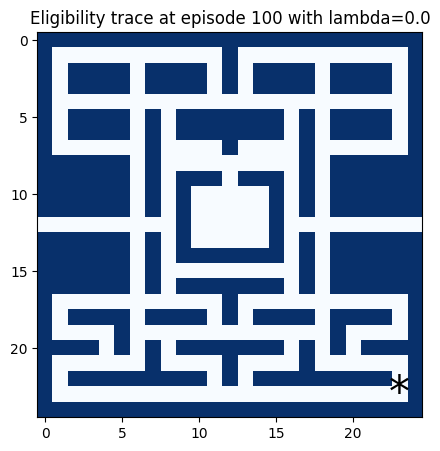

In [23]:
SARSAAgent = SARSALambda(env=PacMan_1, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_1, SARSAAgent, EPISODES)

In [24]:
PacMan_1.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   <  >  >  >  >  >                                                      
   v              v                                                      
                  ^                                                      
      <  >  >  >  ^  >  >                                                
                  v     v                       ^                        
                        ^                       v                        
                        v  >  >  ^     <  ^  ^  >                        
                        ^  v  v  >  ^  v  v  v  >                        
                        ^           ^           ^                        
                        v     ^  >  <  >  ^     ^                        
                              <  ^  ^  <  ^     v                        
                              <  <  > 

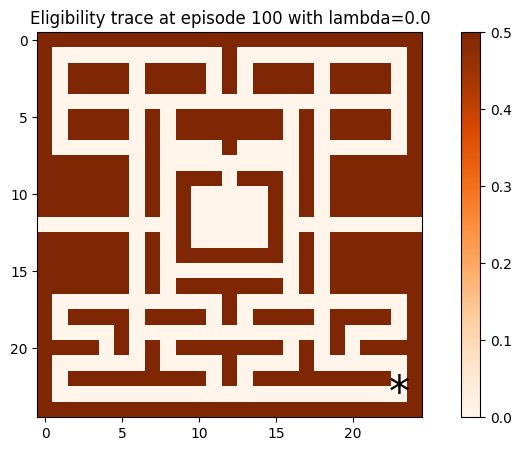

In [25]:
QLearningAgent = QLearningLambda(env=PacMan_1, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_1, QLearningAgent, EPISODES)

In [26]:
PacMan_1.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      <  <  <  >  >                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
         <  >  >  >                                                      
                  ^                                                      
                  v                                                      
                  ^                                                      
                  ^     ^                                                
                  v  <  >             

In [27]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

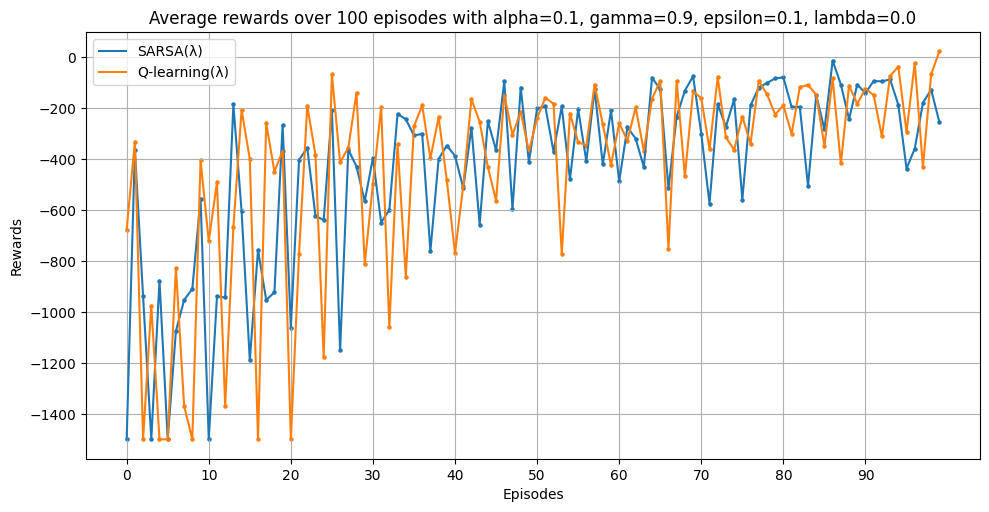

In [28]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

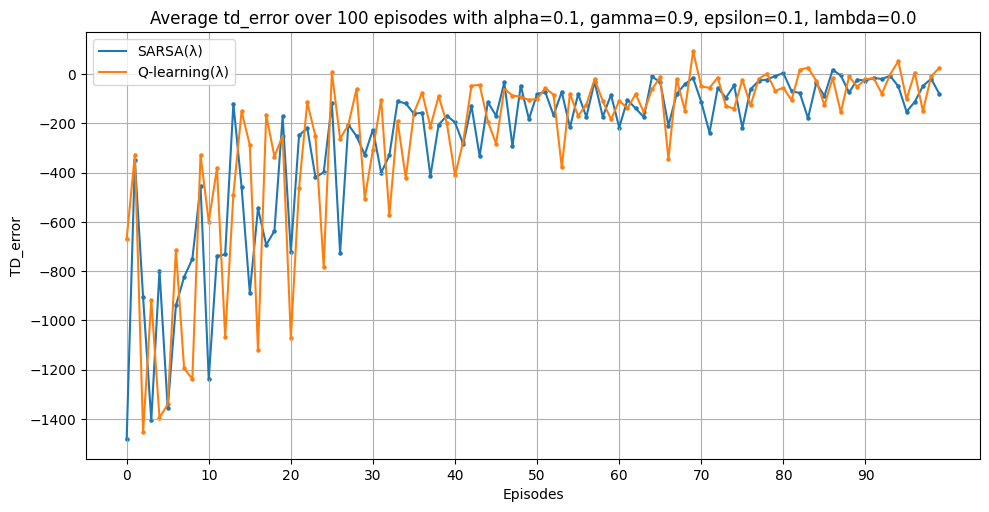

In [29]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()



###Level 2




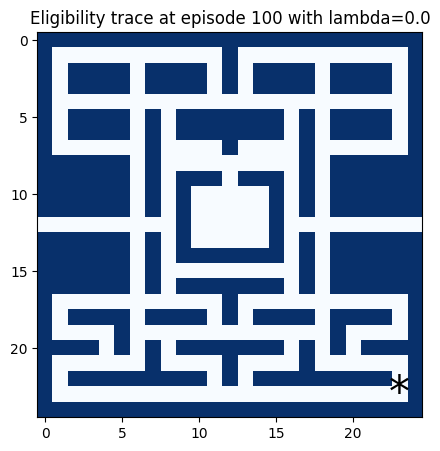

In [30]:
SARSAAgent = SARSALambda(env=PacMan_2, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_2, SARSAAgent, EPISODES)

In [31]:
PacMan_2.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      >  >  <  <  <  <  <  <  <  >                                       
                  v                    ^                                 
                  v                    v                                 
                  v  >  >  <  >  >  <  >  >  >  >                        
                                                ^                        
                                                v                        
                                       ^  >  ^  ^                        
                                    ^  >  >  <  >                        
                                    ^           ^     ^                  
                              ^  <  >  ^  >     v     v                  
                              <  ^  <  <  v     v     v                  
                              v  <  ^ 

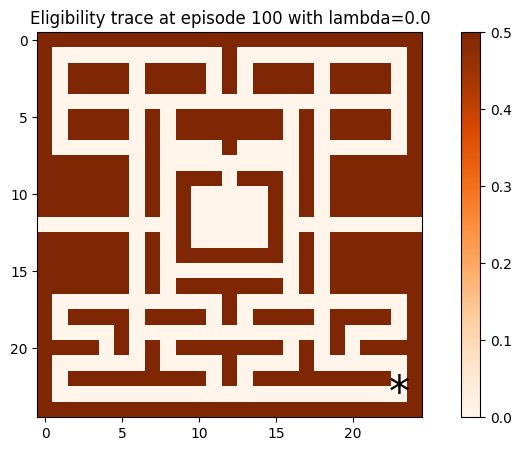

In [32]:
QLearningAgent = QLearningLambda(env=PacMan_2, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_2, QLearningAgent, EPISODES)

In [33]:
PacMan_2.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      >  <  >  <  ^  >  <  >  >  >     <  <  <  <  >  >  <  <  <  <  ^   
                  ^              ^     v              ^              ^   
                  ^              v     v              v              ^   
                  v           <  >  <  >  <  >  <  <  ^  <  >  >  >  ^   
                                                v     ^              ^   
                                                v     v              ^   
                                       ^  >  >  v                 <  >   
                                    <  <  v  <  v                        
                                                v                        
                                                v                        
                                                v                        
                                      

In [34]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

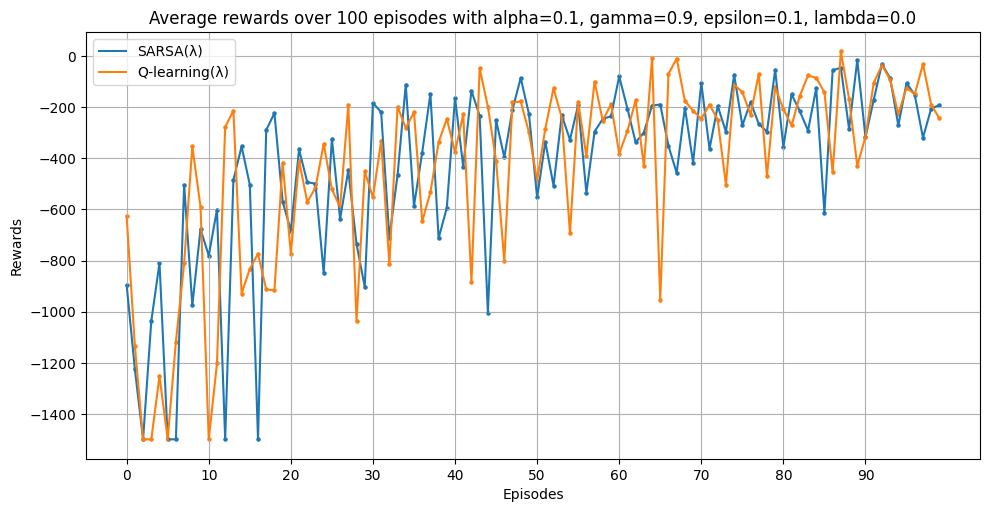

In [35]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

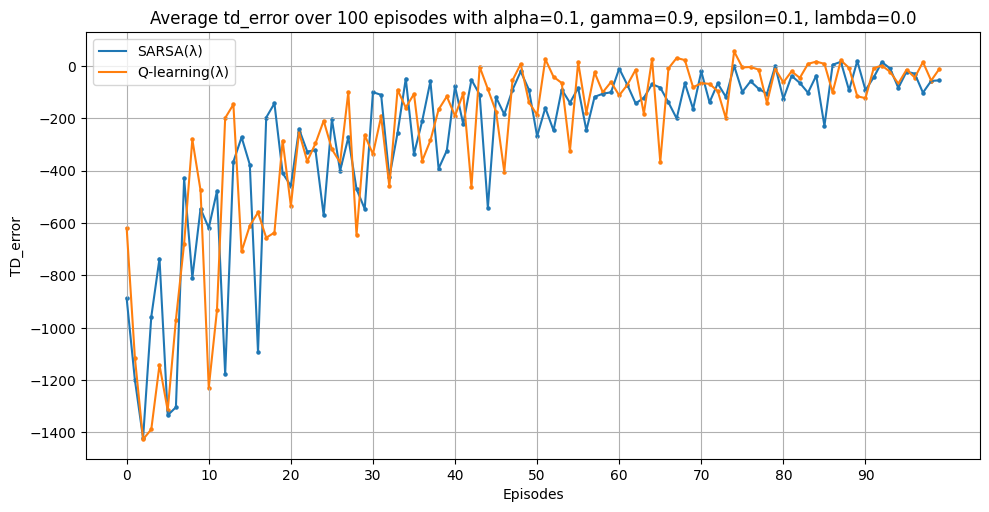

In [36]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()



###Level 3




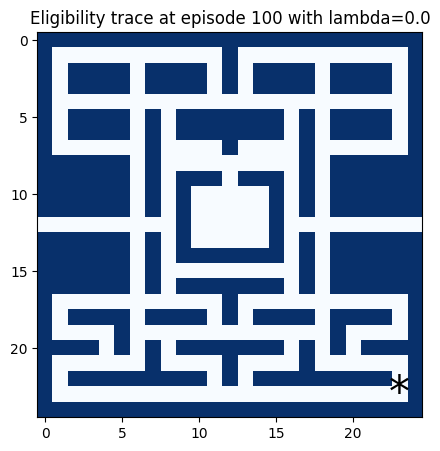

In [37]:
SARSAAgent = SARSALambda(env=PacMan_3, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_3, SARSAAgent, EPISODES)

In [38]:
PacMan_3.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   ^  <  >                                                               
   v                                                                     
   v                                                                     
   v              ^  <  <  <  >                 ^  >  >  >  >  >  >  >   
   v              ^     v                       ^                    v   
   ^              ^     v                       ^                    v   
   v  >  >  >  >  ^     ^  >  >  >     <  ^  >  >     <  <  <  <  >  v   
                  ^     v  v  >  >  >  <  v  v  >     v                  
                  v     ^           ^                 v                  
                        v     ^  ^  <  <  ^           ^                  
                              ^  >  <  >  >           v                  
                              ^  ^  ^ 

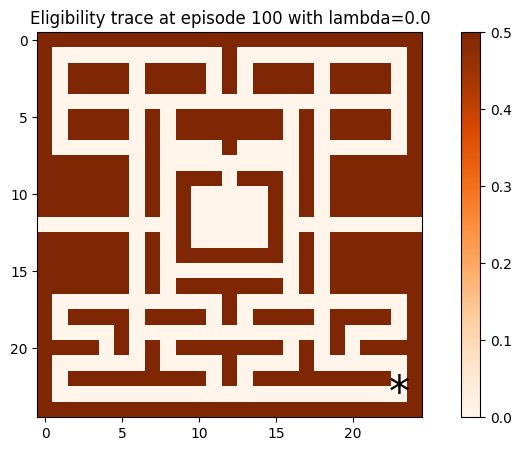

In [39]:
QLearningAgent = QLearningLambda(env=PacMan_3, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_3, QLearningAgent, EPISODES)

In [40]:
PacMan_3.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   ^  >  <  <  >  ^  >  >  >  >  >     <  <  >  <  <  ^  <  >            
   ^              v              v     v              ^                  
   ^              ^              v     v              ^                  
   v           <  v  >  ^  >  >  v  <  v  <  <  >  <  <  <  >            
                  ^     ^                       v     ^                  
                  ^     ^                       v     ^                  
         <  >  >  >     v        ^     ^  >  ^  >     ^  >               
                  v        <  >  >  ^  >  v  <  >     ^                  
                                    ^           ^     ^                  
                              <  ^  ^  ^  >     v     v                  
                              v  >  ^  ^  v     v                        
                              v  >  < 

In [41]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

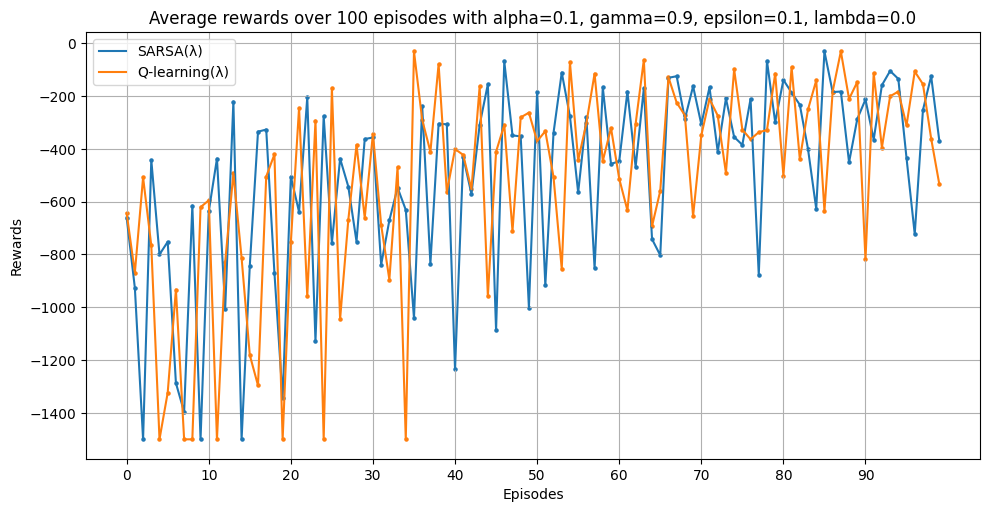

In [42]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

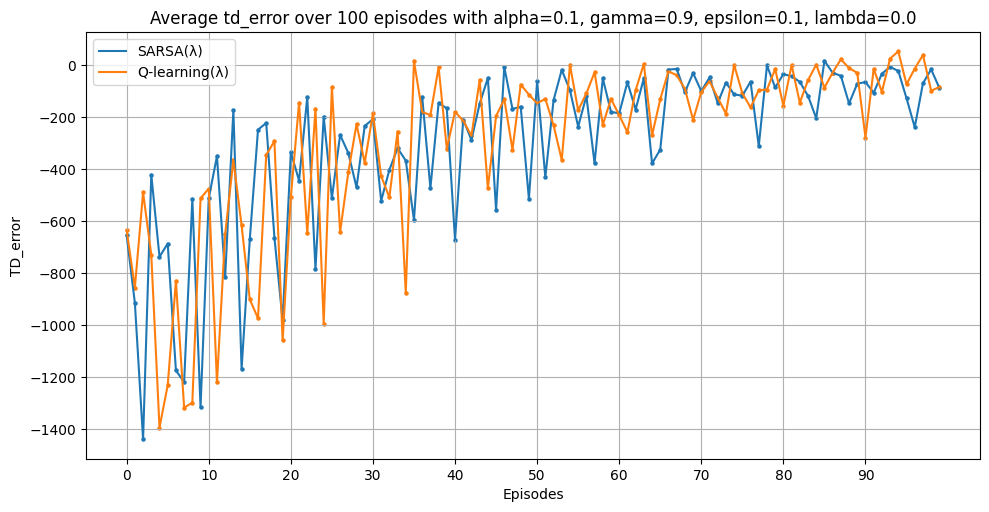

In [43]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()



###Level 4




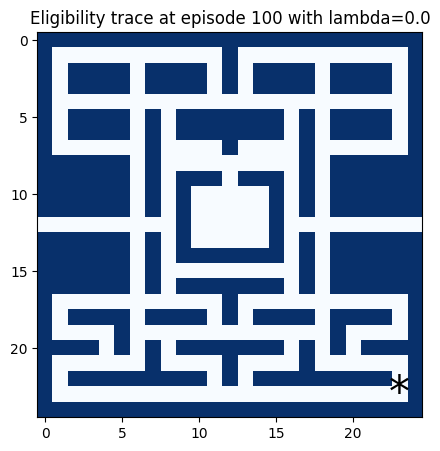

In [44]:
SARSAAgent = SARSALambda(env=PacMan_4, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_4, SARSAAgent, EPISODES)

In [45]:
PacMan_4.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   ^  >  >  <  >  >  >  >  >  >  >     <  <  >  <  <  ^  >  >  >  >  >   
   ^                             ^     ^              ^              v   
   ^                             ^     ^              v              v   
   v                          <  >  >  >              v  <  <  <  >  ^   
                                                      v              ^   
                                                      ^              ^   
                  F                                   ^  <  <  <  >  >   
                                                      v                  
                                                      v                  
                                                      v                  
                                                      ^                  
                                      

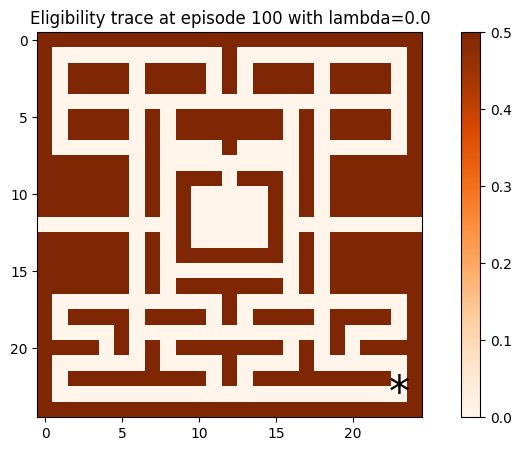

In [46]:
QLearningAgent = QLearningLambda(env=PacMan_4, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_4, QLearningAgent, EPISODES)

In [47]:
PacMan_4.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   <  >                                                                  
   v                                                                     
   v              ^                                                      
   ^  >  <  >  <  v  >  >                                                
   ^                    v                                                
   ^                    ^                                                
   <  <  <  <  >  F     v  >                                             
                  ^     v                                                
                  v     v                                                
                  v     v                                                
                  v     ^                                                
<  >  >  >  >  >  >  >  v             

In [48]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

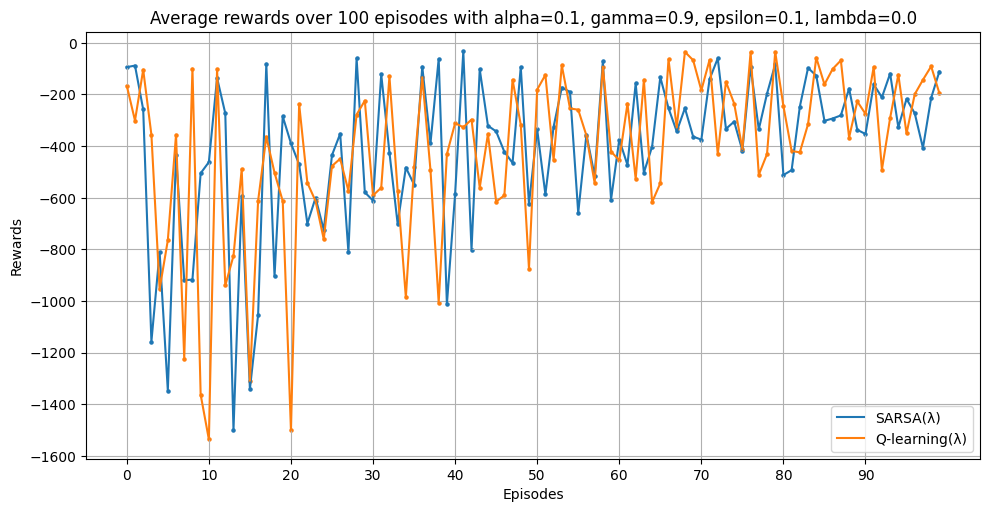

In [49]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

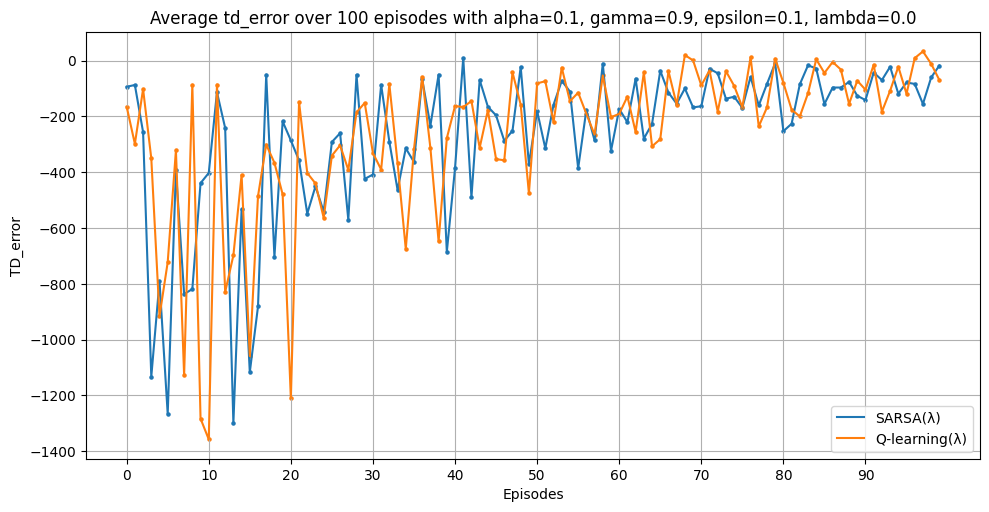

In [50]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

##LAMBDA = 0.8

In [51]:
l=0.8

###Level 1

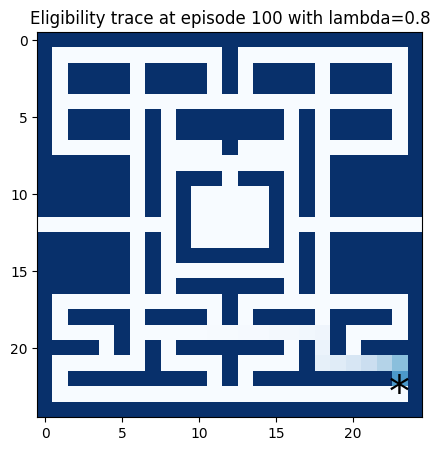

In [52]:
SARSAAgent = SARSALambda(env=PacMan_1, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_1, SARSAAgent, EPISODES)

In [53]:
PacMan_1.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v                                                                     
   v                                                                     
   v                                                                     
   v  >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                   

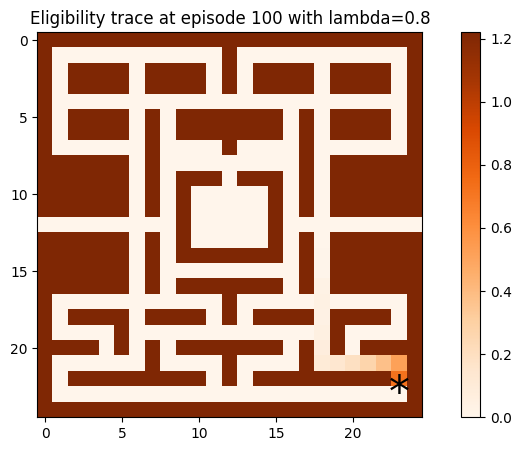

In [54]:
QLearningAgent = QLearningLambda(env=PacMan_1, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_1, QLearningAgent, EPISODES)

In [55]:
PacMan_1.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      <  >  >  >  >  <  >  >  >  >                                       
                                 v                                       
                                 v                                       
                                 v  >  >  >  >  >                        
                                                v                        
                                                v                        
                                                v                        
                                                v                        
                                                v                        
                                                v                        
                                                v                        
                                      

In [56]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

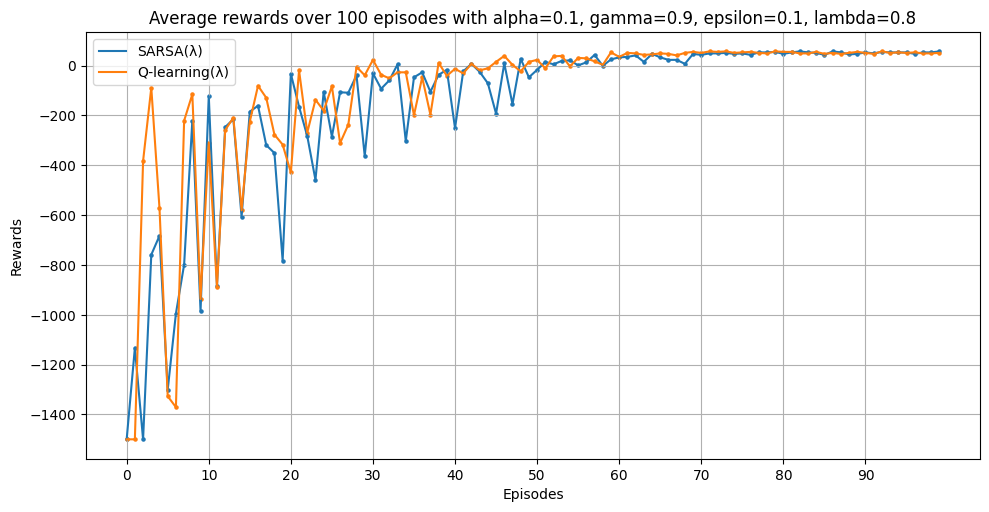

In [57]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

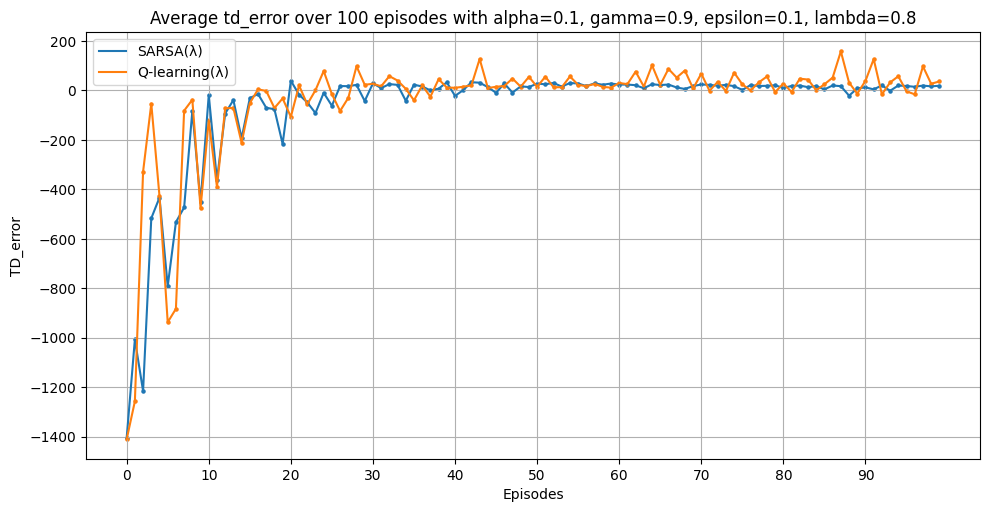

In [58]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

###Level 2

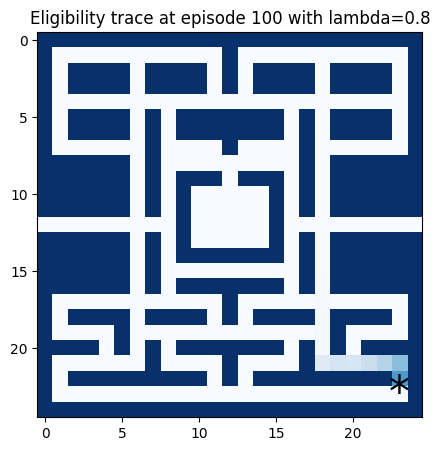

In [59]:
SARSAAgent = SARSALambda(env=PacMan_2, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error,sarsa_steps = run_sarsa_episodes(PacMan_2, SARSAAgent, EPISODES)

In [60]:
PacMan_2.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v  >  >  >  >  >  >  >  >  >  >  >  >                  
                                                      v                  
                                                      v                  
                                                      v                  
                                                      v                  
                                                      v                  
                                                      v                  
                                                      v                  
                                      

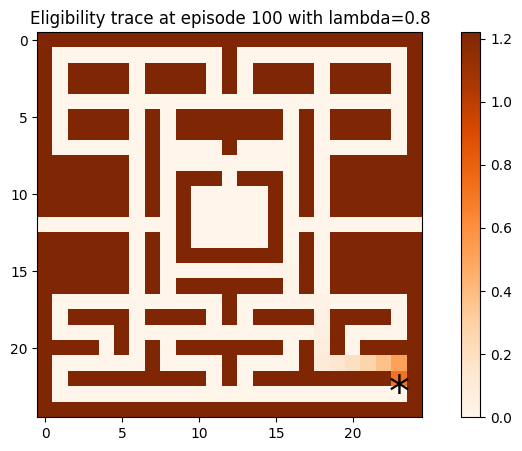

In [61]:
QLearningAgent = QLearningLambda(env=PacMan_2, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_2, QLearningAgent, EPISODES)

In [62]:
PacMan_2.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v                                                                     
   v                                                                     
   v                                                                     
   v  >  >  >  >  >                                                      
                  ^                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v  >  >             

In [63]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

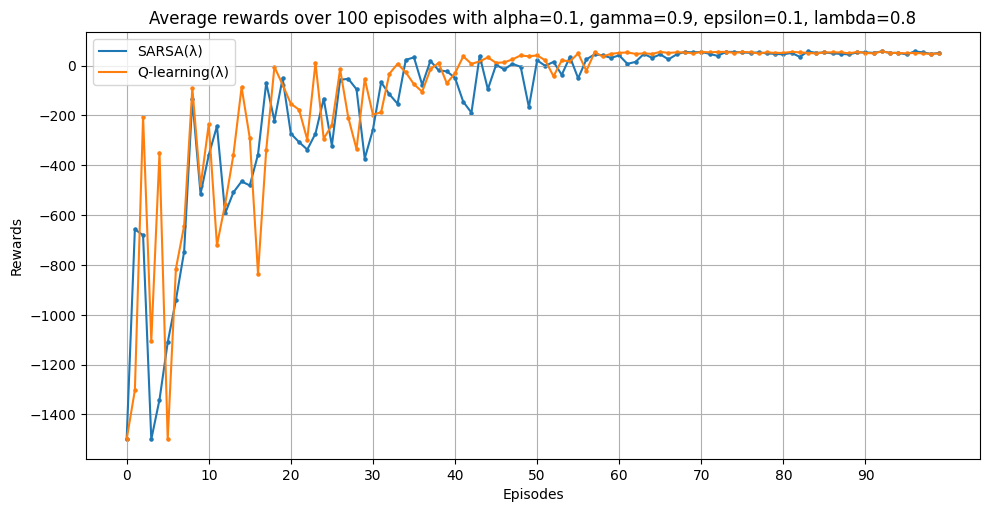

In [64]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

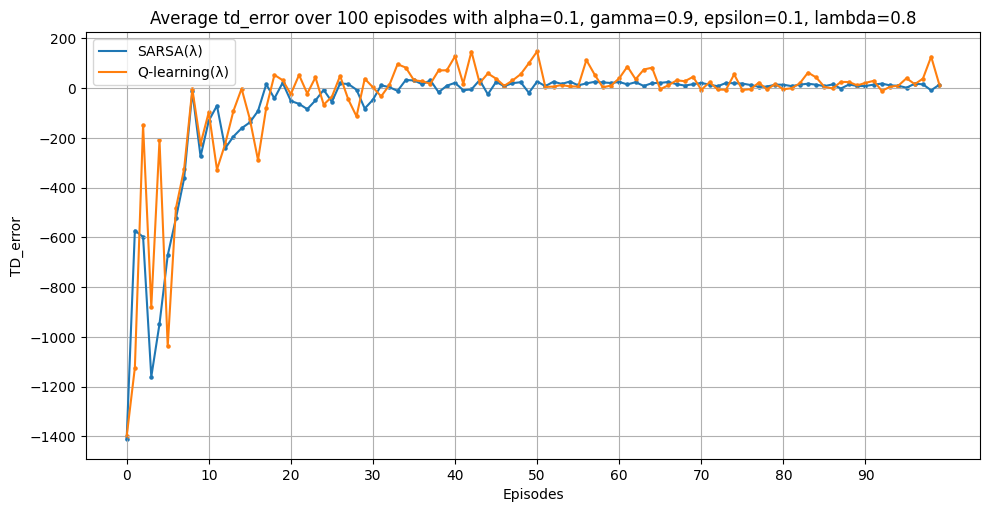

In [65]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

###Level 3

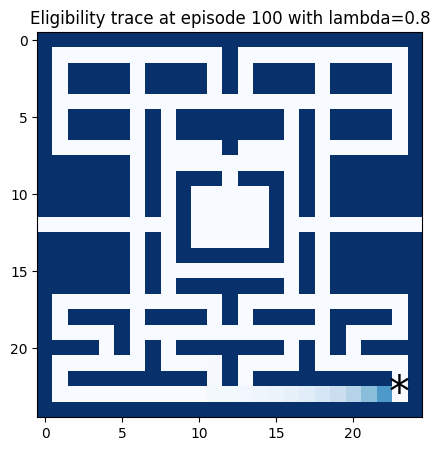

In [66]:
SARSAAgent = SARSALambda(env=PacMan_3, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_3, SARSAAgent, EPISODES)

In [67]:
PacMan_3.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v  >  >  >  >  >                                                      
                  ^                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                   

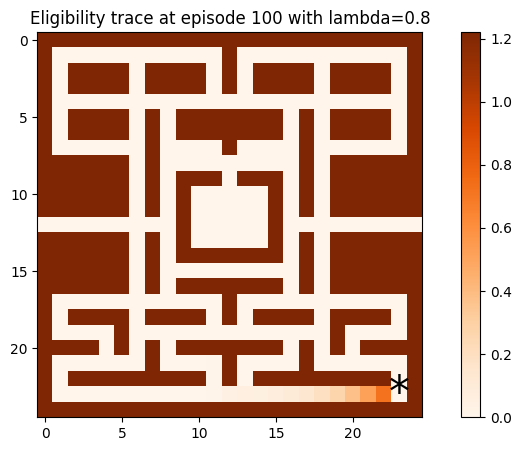

In [68]:
QLearningAgent = QLearningLambda(env=PacMan_3, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_3, QLearningAgent, EPISODES)

In [69]:
PacMan_3.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v                                                                     
   ^                                                                     
   v                                                                     
   <  >  >  >  <  >                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                   

In [70]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

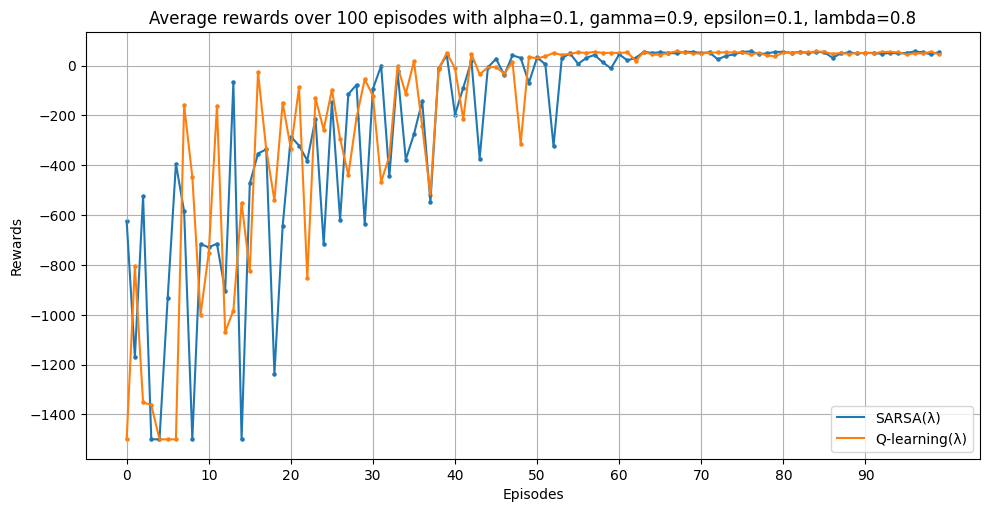

In [71]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

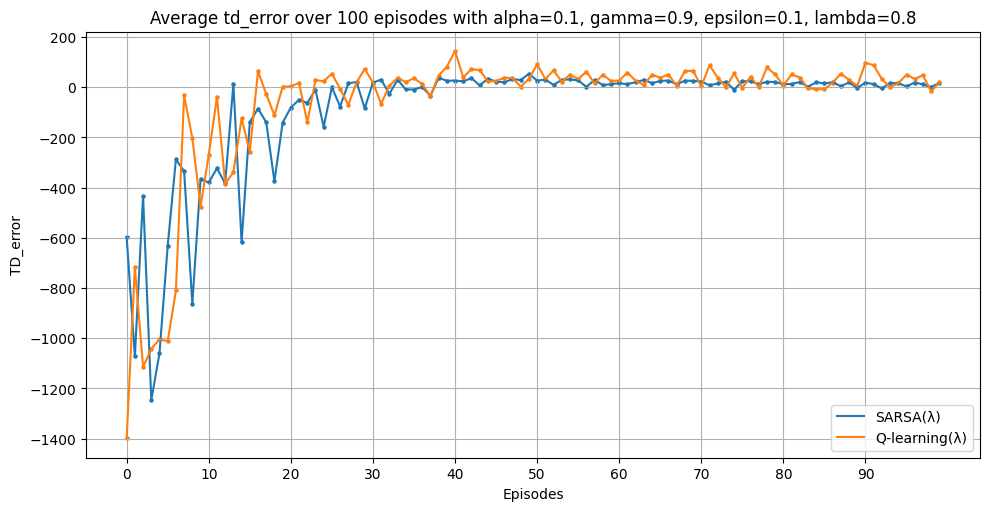

In [72]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

###Level 4

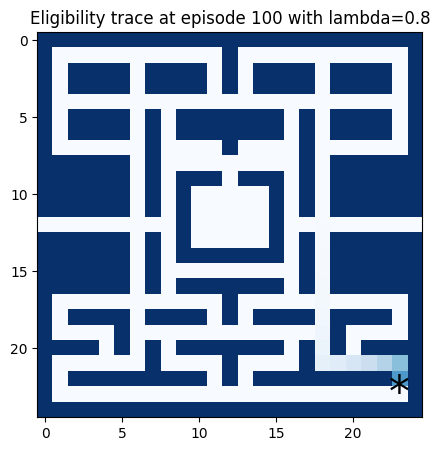

In [73]:
SARSAAgent = SARSALambda(env=PacMan_4, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_4, SARSAAgent, EPISODES)

In [74]:
PacMan_4.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v  >  <  >  <  >  >  >  >  >  >                        
                                                v                        
                                                v                        
                  F                          <  v                        
                                             v  >                        
                                                v                        
                                                v                        
                                                v                        
                                      

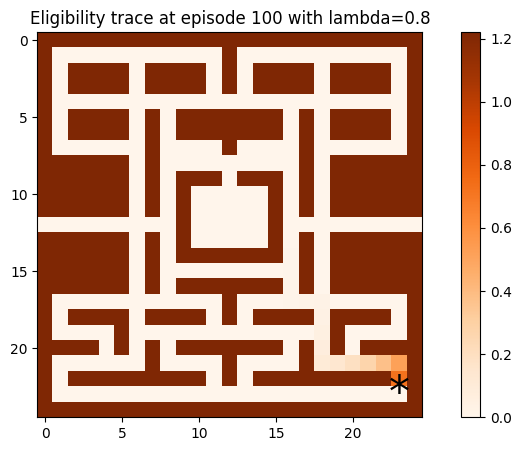

In [75]:
QLearningAgent = QLearningLambda(env=PacMan_4, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_4, QLearningAgent, EPISODES)

In [76]:
PacMan_4.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v  >  >  >  >  >  >  >                                                
                        v                                                
                        v                                                
                  F     v  >  <  >           ^                           
                              <  >  >  <  >  v  >                        
                                                v                        
                                                v                        
                                                v                        
                                      

In [77]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

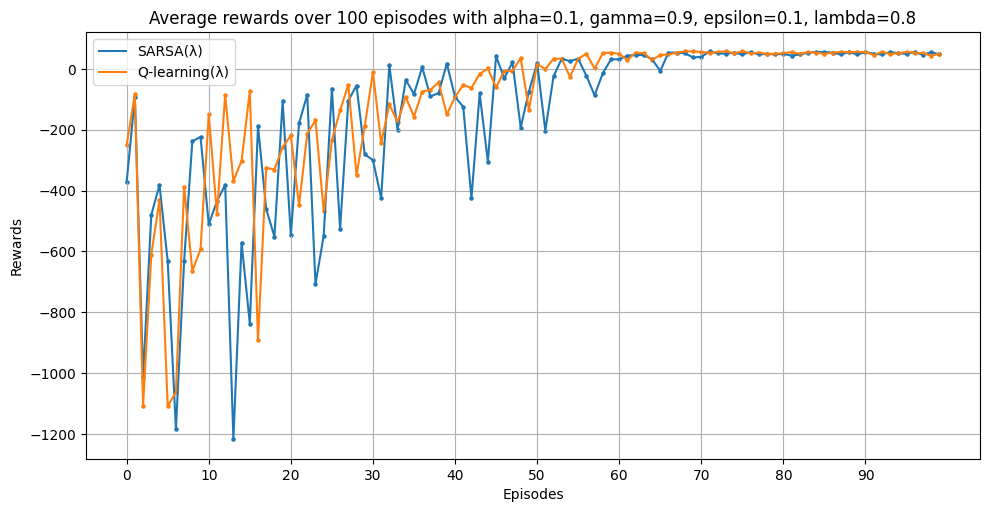

In [78]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

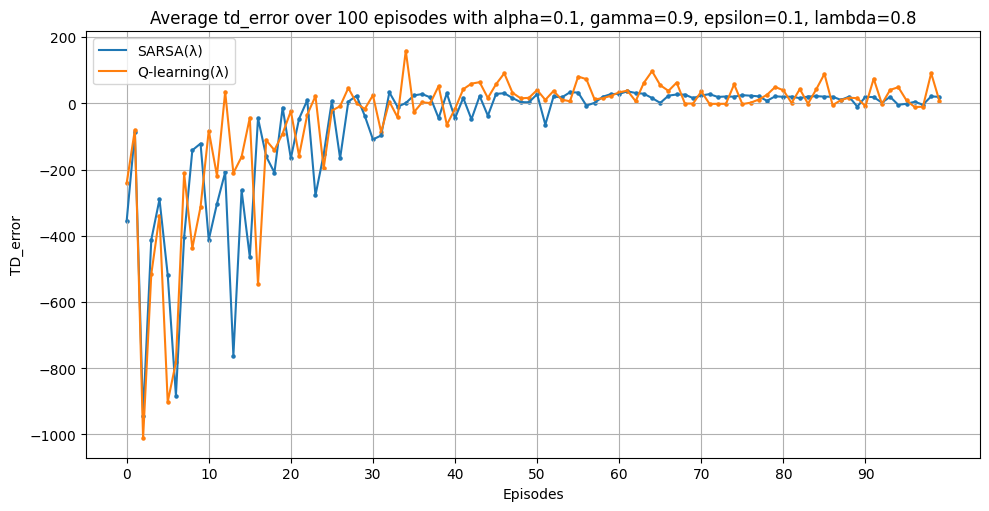

In [79]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

##LAMBDA = 1



###Level 1




In [80]:
l = 1.0

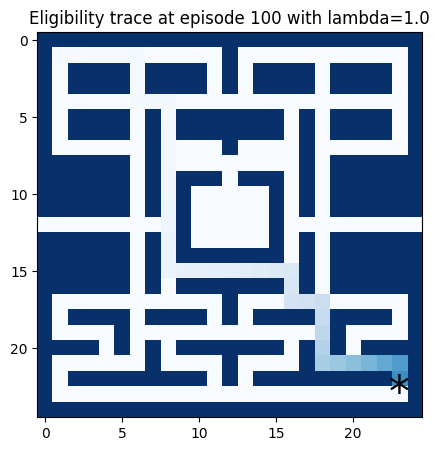

In [81]:
SARSAAgent = SARSALambda(env=PacMan_1, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_1, SARSAAgent, EPISODES)

In [82]:
PacMan_1.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v  >  >                                                
                        v                                                
                        v                                                
                        v                                                
                        v                                                
                        v                                                
                        v                                                
                        v                                                
                        v             

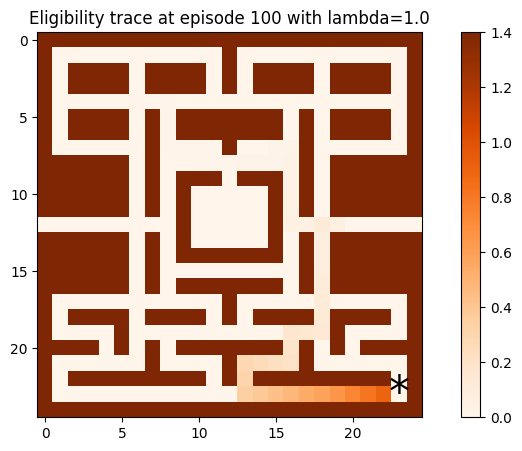

In [83]:
QLearningAgent = QLearningLambda(env=PacMan_1, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_1, QLearningAgent, EPISODES)

In [84]:
PacMan_1.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v  >  >  >  >  >  >  ^                                                
                        v                                                
                        v                                                
                        v  >  >              ^  >                        
                              v  >  >  >  >  >  v                        
                                                v                        
                                                v                        
                                                v                        
                                      

In [85]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

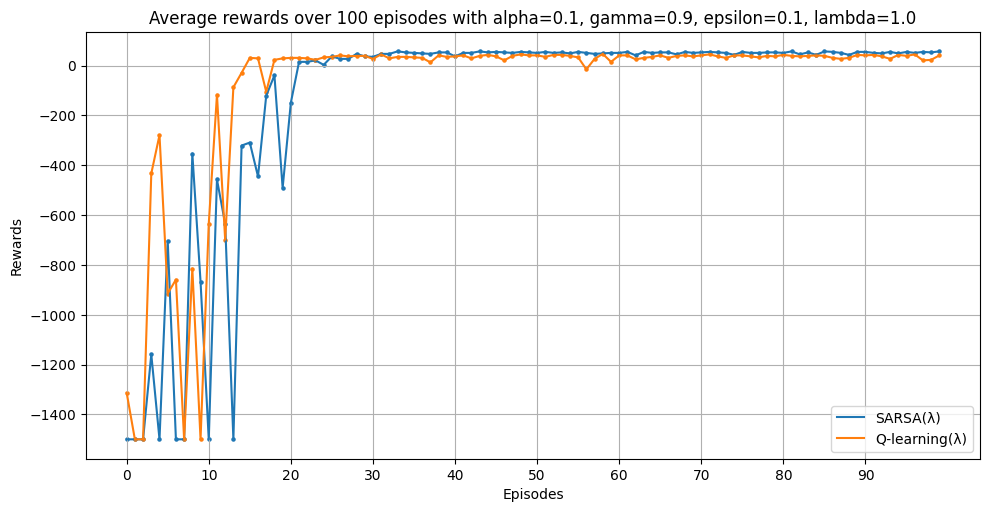

In [86]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

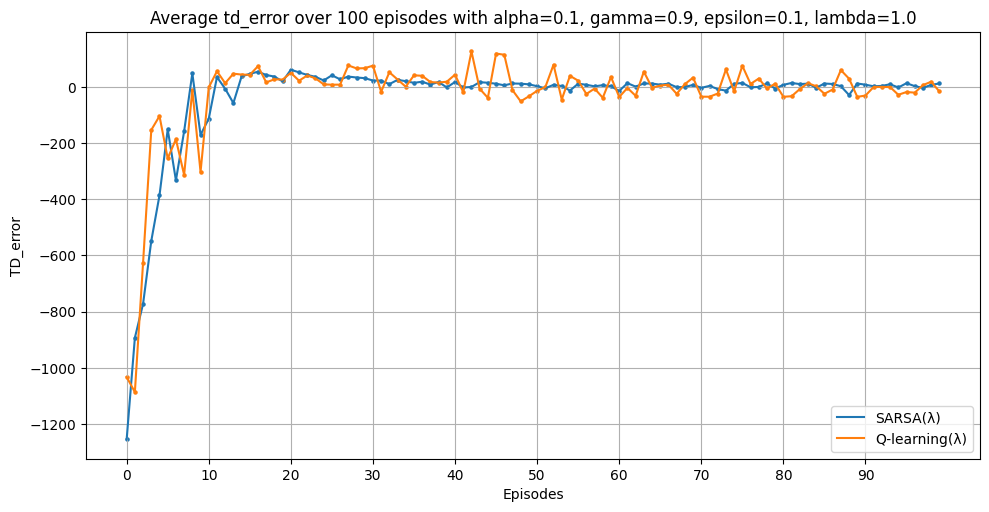

In [87]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()



###Level 2




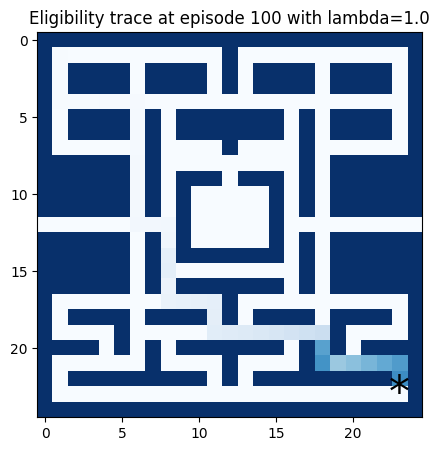

In [88]:
SARSAAgent = SARSALambda(env=PacMan_2, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_2, SARSAAgent, EPISODES)

In [89]:
PacMan_2.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v  >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v  >  >             

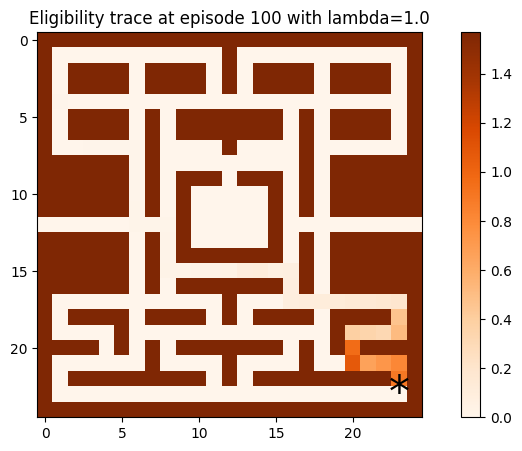

In [90]:
QLearningAgent = QLearningLambda(env=PacMan_2, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_2, QLearningAgent, EPISODES)

In [91]:
PacMan_2.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   ^                                                                     
   v                                                                     
   v                                                                     
   v                                                                     
   v  >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v  >  >             

In [92]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

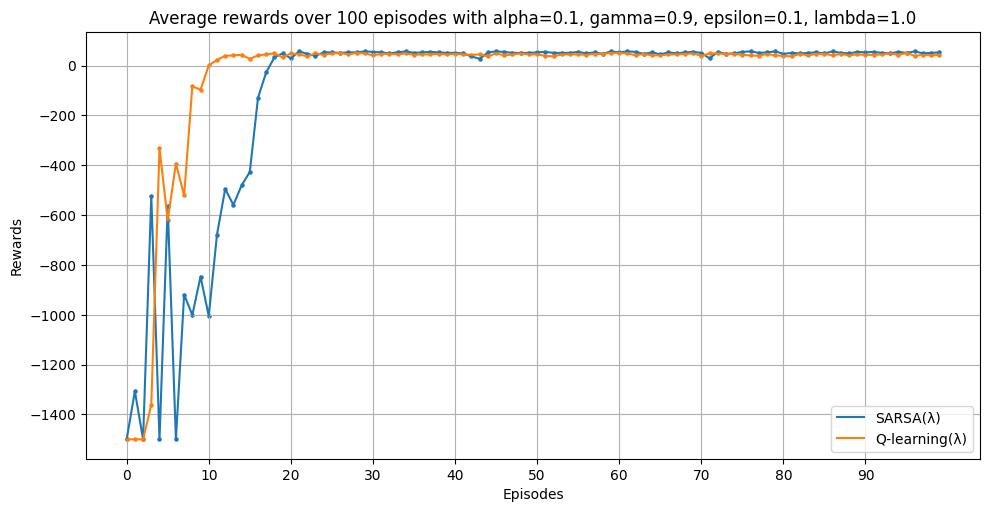

In [93]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

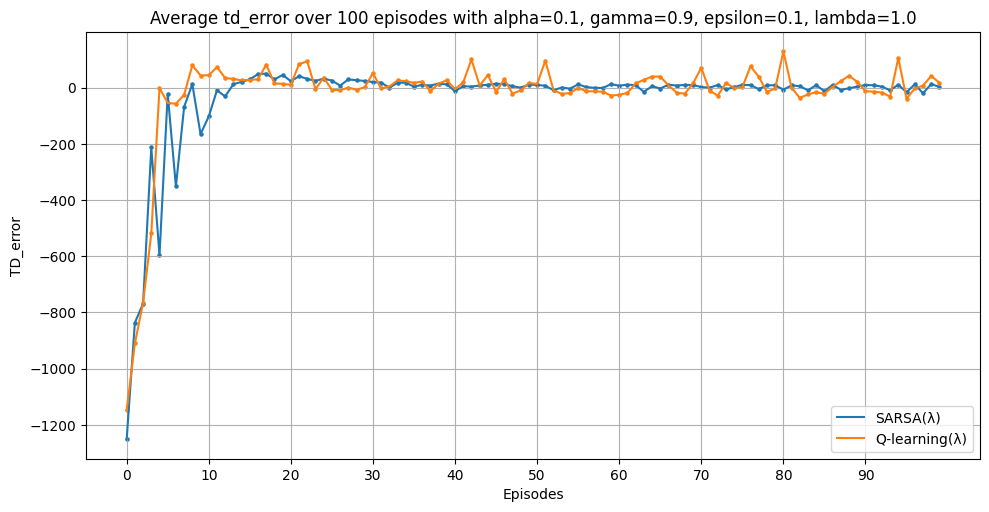

In [94]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()



###Level 3




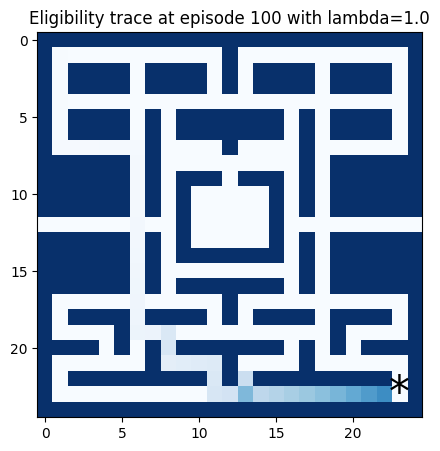

In [95]:
SARSAAgent = SARSALambda(env=PacMan_3, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_3, SARSAAgent, EPISODES)

In [96]:
PacMan_3.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v                                                                     
   v                                                                     
   v                                                                     
   v  >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                   

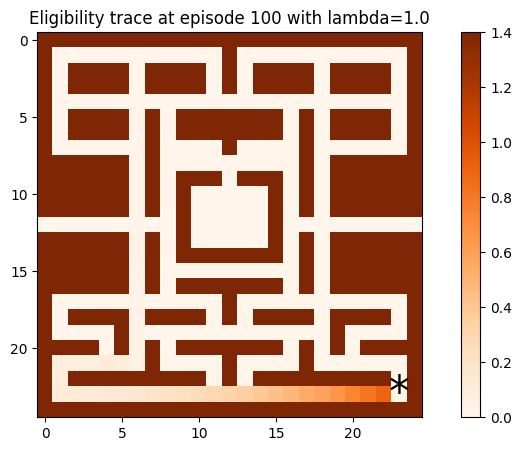

In [97]:
QLearningAgent = QLearningLambda(env=PacMan_3, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_3, QLearningAgent, EPISODES)

In [98]:
PacMan_3.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
   ^                                                                     
   v                                                                     
   v                                                                     
   v  >  >  >  >  >                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                                                      
                  v                   

In [99]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

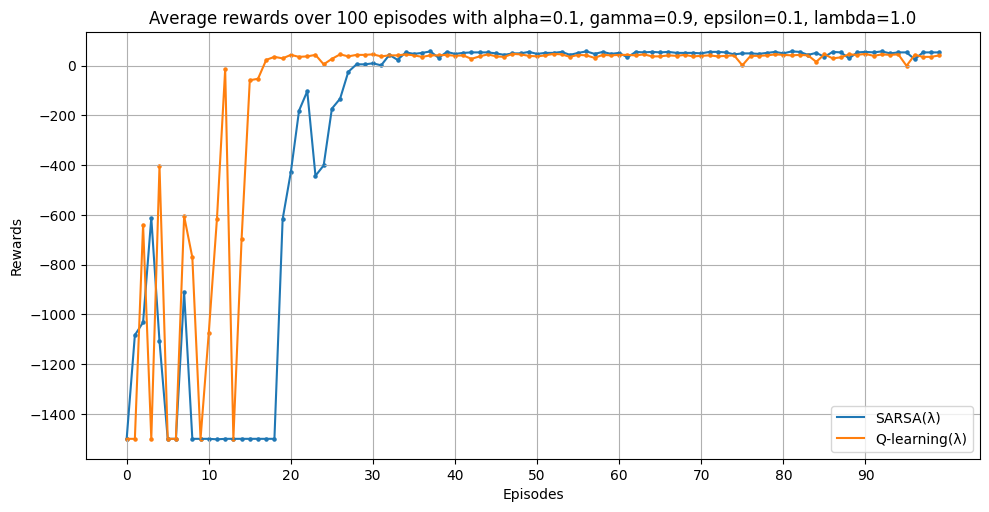

In [100]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

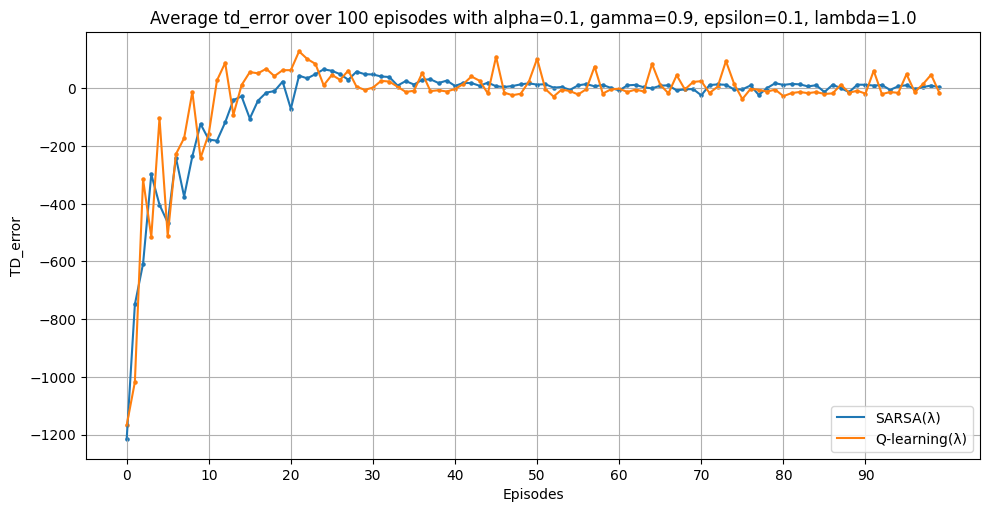

In [101]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()



###Level 4




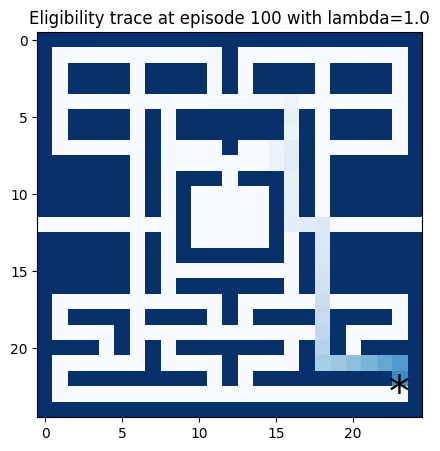

In [102]:
SARSAAgent = SARSALambda(env=PacMan_4, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

sarsa_rewards, sarsa_td_error, sarsa_steps = run_sarsa_episodes(PacMan_4, SARSAAgent, EPISODES)

In [103]:
PacMan_4.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
      >  >  >  >  >  >  >  >  >  >                                       
                                 v                                       
                                 v                                       
                                 v  >  >  >  >  ^                        
                                                v                        
                                                v                        
                  F                          ^  >                        
                                             <  v                        
                                                v                        
                                                v                        
                                                v                        
                                      

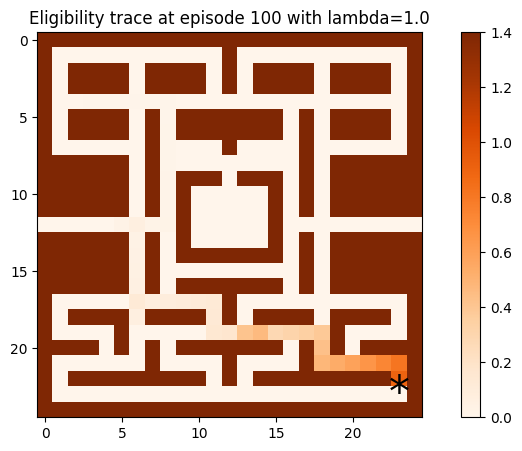

In [104]:
QLearningAgent = QLearningLambda(env=PacMan_4, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, lambd=l)

q_rewards, q_td_error, q_steps = run_qlearning_episodes(PacMan_4, QLearningAgent, EPISODES)

In [105]:
PacMan_4.show_trajectory()

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
                                                                         
                                                                         
   v                                                                     
   v                                                                     
   v  >  >  >  >  >  >  >                                                
                        v                                                
                        v                                                
                  F     v                                                
                        v                                                
                        v                                                
                        v                                                
                        v                                                
               <  >  <  v             

In [106]:
Tot_avg_results.append(list((mean(sarsa_rewards), mean(sarsa_td_error), mean(sarsa_steps), mean(q_rewards), mean(q_td_error), mean(q_steps))))

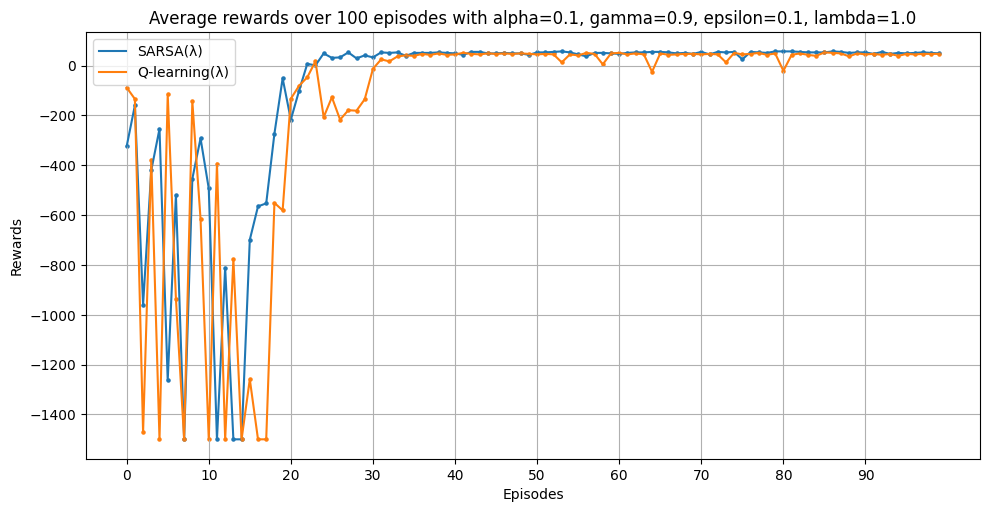

In [107]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_rewards, label='SARSA(λ)')
plt.scatter(x, sarsa_rewards, s=5)
plt.plot(x, q_rewards, label='Q-learning(λ)')
plt.scatter(x, q_rewards, s=5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_rewards), 10)])
plt.legend()
plt.title(f'Average rewards over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

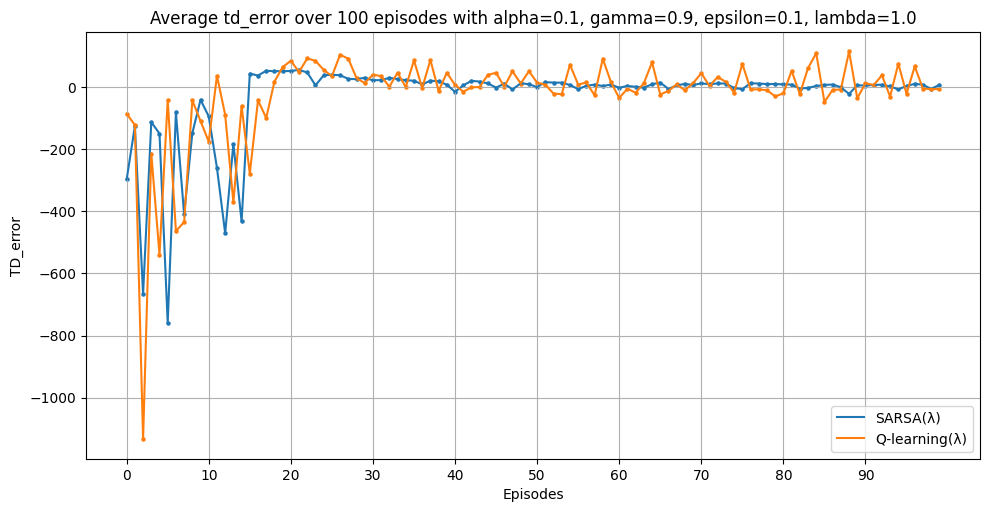

In [108]:
x = [str(i) for i in range(len(sarsa_rewards))]
plt.plot(x, sarsa_td_error, label='SARSA(λ)')
plt.scatter(x, sarsa_td_error, s=5)
plt.plot(x, q_td_error, label='Q-learning(λ)')
plt.scatter(x, q_td_error, s=5)
plt.xlabel('Episodes')
plt.ylabel('TD_error')
plt.tight_layout()
plt.grid()
plt.xticks([i for i in range(0, len(sarsa_td_error), 10)])
plt.legend()
plt.title(f'Average td_error over {EPISODES} episodes with alpha={ALPHA}, gamma={GAMMA}, epsilon={EPSILON}, lambda={l}')
plt.show()

#Average Results Experiments

In [109]:
df = pd.DataFrame(Tot_avg_results, columns = ['Sarsa Rewards avg', 'Sarsa TDerror avg', 'Sarsa Steps avg', 'QL Rewards avg', 'QL TDerror avg', 'QL Steps avg'])
df.set_index([pd.Index(['Level1 Lam=0.0', 'Level2 Lam=0.0', 'Level3 Lam=0.0', 'Level4 Lam=0.0','Level1 Lam=0.8', 'Level2 Lam=0.8', 'Level3 Lam=0.8', 'Level4 Lam=0.8', 'Level1 Lam=1.0', 'Level2 Lam=1.0', 'Level3 Lam=1.0', 'Level4 Lam=1.0'])])

,Sarsa Rewards avg,Sarsa TDerror avg,Sarsa Steps avg,QL Rewards avg,QL TDerror avg,QL Steps avg
Level1 Lam=0.0,-439.84,-273.349736,536.80,-427.72,-257.842881,522.66
Level2 Lam=0.0,-428.73,-268.250255,524.86,-429.58,-255.249584,526.54
Level3 Lam=0.0,-509.00,-303.490561,593.65,-522.43,-302.513309,601.36
Level4 Lam=0.0,-411.88,-271.567760,467.50,-413.27,-266.217737,466.76
Level1 Lam=0.8,-151.82,-71.084626,250.80,-113.66,-47.232139,212.64
Level2 Lam=0.8,-139.56,-71.403155,238.54,-114.76,-48.439108,213.74
Level3 Lam=0.8,-206.14,-87.980654,297.10,-191.13,-69.066742,283.59
Level4 Lam=0.8,-143.79,-71.462853,226.79,-112.96,-50.471081,197.46
Level1 Lam=1.0,-142.32,-37.027405,235.24,-93.58,-28.346890,190.54
Level2 Lam=1.0,-107.96,-36.166865,204.92,-39.83,-20.956826,137.80


#Final Comment:
Generaly we can say that Q-Learning method converges faster than the SARSA method. This is clearer in the examples with lambda higher than 0, since with higher lambdas it converges faster.

The same thing cannot be said about the TD error. From the plot we can see that Q-Learning method has more spikes and isn't stable. This is because the Q-Learning method is an off-policy method and doesn't need to follow the optimal policy learned.

From the heatmap plots we can see that the eligibility trace gets longer as lambda grows.

In the end from the table we can clearly see that Q-Learning has better results overall with: higher rewards, less steps and TD error.
Even though with lambda equal to 0 Sarsa can sometimes get better results, but most of times Q-Learning seems to get slightly better results.

